Q1. load the dataset csv file as a dataframe using Pandas.

In [287]:
import pandas as pd

In [322]:
#Loading dataset
df= pd.read_csv("/content/WorldPopulation_detailed_annual.csv")

#cleaning data

#storing text file containing list of countries as a list
country_list = list(open('//content//List of the Countries and Territories.txt','r'))

#removing '\n' character from list of country names 
country_list = [ line.strip() for line in country_list]

#There seems to be records with invalid country names like World. 
#We will make use of country list text file to filter out incorrect country records.
#filtering out invalid countries using country name list
df = df[df['Country Name'].isin(country_list)]

df =df.reset_index(drop=True)
df.head()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,ALB,"Population, total",1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,AND,"Population, total",13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [323]:
df.tail()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
182,Vanuatu,VUT,"Population, total",63689.0,65705.0,67794.0,69946.0,72115.0,74270.0,76395.0,...,236211.0,242653.0,249499.0,256635.0,263888.0,271130.0,278330.0,285510.0,292680.0,299882.0
183,Samoa,WSM,"Population, total",108629.0,112105.0,115776.0,119559.0,123342.0,127054.0,130673.0,...,185949.0,187469.0,189088.0,190717.0,192221.0,193513.0,194535.0,195352.0,196130.0,197097.0
184,South Africa,ZAF,"Population, total",17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0
185,Zambia,ZMB,"Population, total",3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0
186,Zimbabwe,ZWE,"Population, total",3776681.0,3905034.0,4039201.0,4178726.0,4322861.0,4471177.0,4623351.0,...,12697723.0,12894316.0,13115131.0,13350356.0,13586681.0,13814629.0,14030390.0,14236745.0,14439018.0,14645468.0


Q2. for the last year available, compute the country rank by population.

In [352]:
#creating a seperate dataframe to store subset of Country name and population in last year 2019.
df_q2 = df[["Country Name","2019"]]

#sorting countries based on descending order of their population
df_q2 = df_q2.sort_values(by="2019",ascending=False)

#Creating rank column that gives rank of 1 highly populated countries and increases as population reduces.  
df_q2.insert(2,'Rank',range(1,1+len(df_q2)))

#converting exponential value to integer 
df_q2['2019'] = df_q2['2019'].map(int)

#resetting index to valid sequence
df_q2 = df_q2.reset_index(drop=True)

df_q2.head()

,Country Name,2019,Rank
0,China,1397715000,1
1,India,1366417754,2
2,United States,328239523,3
3,Indonesia,270625568,4
4,Pakistan,216565318,5


In [325]:
df_q2.tail()

,Country Name,2019,Rank
182,Gibraltar,33701,183
183,British Virgin Islands,30030,184
184,Palau,18008,185
185,Nauru,12581,186
186,Tuvalu,11646,187


Q3. compute annual rate of population growth years from 1960 to 2019. Express the result as percentage rounded to 2 decimal points. What 5 countries had the highest annual growth and which had the lowest annual growth?

In [330]:
df_q3 = df[["Country Name","1960","2019"]]
df_q3 = df_q3[df_q3['Country Name'].isin(country_list)]

#resetting index to valid sequence
df_q3 = df_q3.reset_index(drop=True)

#calculating annual percentage growth rate
df_q3['Population growth %'] = ((df_q3["2019"]/df_q3["1960"])**(1/60)) - 1
df_q3['Population growth %'] = df_q3['Population growth %']

#sorting countries based on descending order of their population
df_q3 = df_q3.sort_values(by="Population growth %",ascending=False)

#formatting annual growth rate 
df_q3['Population growth %'] = df_q3['Population growth %'].map('{:.2%}'.format)

#resetting index to valid sequence
df_q3 = df_q3.reset_index(drop=True)
df_q3["2019"] = df_q3["2019"].map(int)

df_q3 

,Country Name,1960,2019,Population growth %
0,United Arab Emirates,92418.0,9770529,8.08%
1,Qatar,47384.0,2832067,7.06%
2,Kuwait,269029.0,4207083,4.69%
3,Djibouti,83636.0,973560,4.18%
4,Jordan,933102.0,10101694,4.05%
5,Bahrain,162427.0,1641172,3.93%
6,Oman,551740.0,4974986,3.73%
7,Saudi Arabia,4086539.0,34268528,3.61%
8,Cayman Islands,7865.0,64948,3.58%
9,Niger,3388764.0,23310715,3.27%


The 5 countries with highest annual growth rate (highest to lowest) are as follows:
1. United Arab Emirates
2. Qatar
3. Kuwait
4. Djibouti
5. Jordan



The 5 countries with lowest annual growth rate(lowest to highest) are as follows:

1. Bulgaria
2. Lativia
3. Hungary
4. Croatia
5. Lithuania

Q4. compute annual rate of population growth over 10 years from 2010 to 2019. Express the result as percentage rounded to 2 decimal points. What 5 countries had the highest an- nual growth and which had the lowest annual growth? Are the countries the same as in the previous question.

In [351]:
df_q4 = df[["Country Name","2010","2019"]]
df_q4 = df_q4[df_q4['Country Name'].isin(country_list)]

#resetting index to valid sequence
df_q4 = df_q4.reset_index(drop=True)

#calculating annual percentage growth rate
df_q4['Population growth %'] = (df_q4["2019"]/df_q4["2010"])**(1/10) - 1
df_q4['Population growth %'] = df_q4['Population growth %']

#sorting countries based on descending order of their population
df_q4 = df_q4.sort_values(by="Population growth %",ascending=False)

#formatting annual growth rate 
df_q4['Population growth %'] = df_q4['Population growth %'].map('{:.2%}'.format)

#resetting index to valid sequence
df_q4 = df_q4.reset_index(drop=True)
df_q4["2010"] = df_q4["2010"].map(int)
df_q4["2019"] = df_q4["2019"].map(int)

df_q4.head() 

,Country Name,2010,2019,Population growth %
0,Oman,3041434,4974986,5.04%
1,Qatar,1856327,2832067,4.31%
2,Maldives,365734,530953,3.80%
3,Equatorial Guinea,943639,1355986,3.69%
4,Niger,16464025,23310715,3.54%


The 5 countries with highest annual growth rate (highest to lowest) are as follows:
1. Oman
2. Qatar
3. Maldives
4. Equatorial Guinea
5. Niger

The 5 countries with lowest annual growth rate(lowest to highest) are as follows:

1. Puerto Rico
2. Bosnia and Herzegovina
3. Lithuania
4. Lativia
5. Andorra

No, the countries are not the same as the previous question.

Only Qatar is an exception which has maintained its rank as the second highest in annual population growth rate.

Lithunia and Latvia are still in lowest annual population growth rate list. 

In the 60 year period:

*   Latvia had a lower percentage growth than Lithunia.

In the 10 year period

*  Lithuania had a lower percentage growth than Latvia.






Q5. for 2019 what are the 5 countries with the highest and what are the 5 countries with the lowest population?

In [292]:
#Displaying the dataframe with ranking in terms of highest to lowest population.
df_q2

,Country Name,2019,Rank
0,China,1397715000,1
1,India,1366417754,2
2,United States,328239523,3
3,Indonesia,270625568,4
4,Pakistan,216565318,5
5,Brazil,211049527,6
6,Nigeria,200963599,7
7,Bangladesh,163046161,8
8,Mexico,127575529,9
9,Japan,126264931,10


The 5 countries with highest population (highest to lowest) are as follows:
1. China
2. India
3. United States
4. Indonesia
5. Pakistan


The 5 countries with lowest population (lowest to highest) are as follows:

1. Tuvalu
2. Nauru
3. Palau
4. British Virgin Islands
5. Gibraltar

Q6. for 1960 what are the 5 countries with the highest and what are the 5 countries with the lowest population? Which countries remained in 2019?

In [293]:
#creating a seperate dataframe to store subset of Country name and population in last year 1960.
df_q6 = df[["Country Name","1960"]]

#There seems to be records with invalid country names like World. 
#We will make use of country list text file to filter out incorrect country records.
#filtering out invalid countries using country name list
df_q6 = df_q6[df_q6['Country Name'].isin(country_list)]

#sorting countries based on descending order of their population
df_q6 = df_q6.sort_values(by="1960",ascending=False)

#Creating rank column that gives rank of 1 highly populated countries and increases as population reduces.  
df_q6.insert(2,'Rank',range(1,1+len(df_q6)))

#converting exponential value to integer 
df_q6['1960'] = df_q6['1960'].map(int)

#resetting index to valid sequence
df_q6 = df_q6.reset_index(drop=True)

df_q6

,Country Name,1960,Rank
0,China,667070000,1
1,India,450547679,2
2,United States,180671000,3
3,Japan,92500572,4
4,Indonesia,87751068,5
5,Germany,72814900,6
6,Brazil,72179226,7
7,United Kingdom,52400000,8
8,Italy,50199700,9
9,Bangladesh,48013504,10


The 5 countries with highest population (highest to lowest) are as follows:
1. China
2. India
3. United States
4. Japan
5. Indonesia

The 5 countries with lowest populationlowest to highest) are as follows:

1. Nauru
2. Tuvalu
3. Turks and Caicos Islands
4. Cayman Islands
5. British Virgin Islands

The countries that remained in the highest population list in 2019 are as follows:
1. China, India, and United states at their same ranks.
2. Indonesia moved from 5th to 4th rank in terms of highest population.

The countries that remained in the lowest population list in 2019 are as follows:
1. Tuvalu, Nauru, and British Virgin Islands have remianed in the list.
2. Tuvalu and Nauru swapped ranks, Nauru was lowest in terms of population in 1960 and Tuvalu was next lowest, which changed in 2019, Tuvalu was lowest and Nauru was second lowest.

3. British Virgin islands went from being the 5th lowest in 1960 to 4th lowest in 2019


Q7. for 2010, compute the mean μ and the quartiles Q1 (25%), Q2 (50% or median M), and Q3 (75%).

In [333]:
#creating a seperate dataframe to store subset of Country name and population in last year 1960.
df_q7 = df[["Country Name","2010"]]

#filtering out invalid countries using country name list
df_q7 = df_q7[df_q7['Country Name'].isin(country_list)]

#resetting index to valid sequence
df_q7 = df_q7.reset_index(drop=True)

#dictionary to store statistics related the year 2010
stats_dict_2010 = { "Mean":0 , "Q1":0 , "Q2":0 ,"Q3":0 }

stats_dict_2010["Mean"] = df_q7["2010"].mean()
#stats_dict_2010["Mean"] = round(stats_dict_2010["Mean"])

stats_dict_2010["Q1"] = df_q7["2010"].quantile(0.25)
#stats_dict_2010["Q1"] = round(stats_dict_2010["Q1"])

stats_dict_2010["Q2"] = df_q7["2010"].quantile(0.5)
#stats_dict_2010["Q2"] = round(stats_dict_2010["Q2"])

stats_dict_2010["Q3"] = df_q7["2010"].quantile(0.75)
#stats_dict_2010["Q3"] = round(stats_dict_2010["Q3"])

print("Summary Statistics for the year 2010\n")
print("----------------------------")
print("| Mean | "+ str(round(stats_dict_2010["Mean"]))+"\t   |")
print("----------------------------")
print("| Q1   | "+ str(round(stats_dict_2010["Q1"]))+"\t   |")
print("----------------------------")
print("| M    | "+ str(round(stats_dict_2010["Q2"]))+"\t   |")
print("----------------------------")
print("| Q3   | "+ str(round(stats_dict_2010["Q3"]))+"\t   |")
print("----------------------------")

Summary Statistics for the year 2010

----------------------------
| Mean | 33844455	   |
----------------------------
| Q1   | 1004238	   |
----------------------------
| M    | 6248020	   |
----------------------------
| Q3   | 20254304	   |
----------------------------


8. find 3 countries ”around” Q1, M, Q3 and μ.

Countries around Mean(μ).

In [295]:
#finding absolute distance between mean and population of countries in 2010
df_q7["2010_dist_mean"] = abs(df_q7["2010"] - stats_dict_2010["Mean"])

#sorting values of distance from mean in ascending order 
df_q7 = df_q7.sort_values(by="2010_dist_mean")
#mapping columns to int to improve readability
df_q7["2010_dist_mean"] = df_q7['2010_dist_mean'].map(int)
df_q7

,Country Name,2010,2010_dist_mean
30,Canada,3.400489e+07,160434
146,Sudan,3.454501e+07,700558
175,Uganda,3.242817e+07,1416287
101,Morocco,3.234339e+07,1501065
48,Algeria,3.597746e+07,2133000
80,Iraq,2.974198e+07,4102478
137,Poland,3.804279e+07,4198339
1,Afghanistan,2.918551e+07,4658947
133,Peru,2.902767e+07,4816780
179,Uzbekistan,2.856240e+07,5282054


The 3 countries around μ:
1. Canada
2. Sudan
3. Uganda

Countries around Median

In [296]:
df_q7["2010_dist_median"] = abs(df_q7["2010"] - stats_dict_2010["Q2"])
df_q7 = df_q7.sort_values(by="2010_dist_median")
df_q7["2010_dist_median"] = df_q7['2010_dist_median'].map(int)
df_q7

,Country Name,2010,2010_dist_mean,2010_dist_median
140,Paraguay,6.248020e+06,27596434,0
94,Libya,6.197663e+06,27646791,50357
151,El Salvador,6.183875e+06,27660579,64145
150,Sierra Leone,6.415634e+06,27428820,167614
164,Togo,6.421679e+06,27422775,173659
124,Nicaragua,5.824065e+06,28020389,423955
46,Denmark,5.547683e+06,28296771,700337
54,Finland,5.363352e+06,28481102,884668
85,Jordan,7.261539e+06,26582915,1013519
154,Serbia,7.291436e+06,26553018,1043416


The 3 countries around Median(Q2):
1. Paraguay
2. Libya
3. El Salvador

Countries around Q1

In [297]:
df_q7["2010_dist_Q1"] = abs(df_q7["2010"] - stats_dict_2010["Q1"])
df_q7 = df_q7.sort_values(by="2010_dist_Q1")
df_q7["2010_dist_Q1"] = df_q7['2010_dist_Q1'].map(int)
df_q7

,Country Name,2010,2010_dist_mean,2010_dist_median,2010_dist_Q1
160,Eswatini,1.064837e+06,32779617,5183183,60599
65,Equatorial Guinea,9.436390e+05,32900815,5304381,60599
168,Timor-Leste,1.093523e+06,32750931,5154497,89285
41,Cyprus,1.112612e+06,32731842,5135408,108374
55,Fiji,8.598180e+05,32984636,5388202,144420
44,Djibouti,8.401980e+05,33004256,5407822,164040
19,Bahrain,1.240860e+06,32603594,5007160,236622
117,Mauritius,1.250400e+06,32594054,4997620,246162
71,Guyana,7.494360e+05,33095018,5498584,254802
36,Comoros,6.896920e+05,33154762,5558328,314546


The 3 countries around Q1:
1. Eswatini and Equatorial Guinea
2. Timor-Leste
3. Cyprus

Countries around Q3

In [298]:
df_q7["2010_dist_Q3"] = abs(df_q7["2010"] - stats_dict_2010["Q3"])
df_q7 = df_q7.sort_values(by="2010_dist_Q3")
df_q7["2010_dist_Q3"] = df_q7['2010_dist_Q3'].map(int)
df_q7

,Country Name,2010,2010_dist_mean,2010_dist_median,2010_dist_Q1,2010_dist_Q3
96,Sri Lanka,2.026174e+07,13582717,14013717,19257499,7433
143,Romania,2.024687e+07,13597583,13998851,19242633,7433
34,Cameroon,2.034124e+07,13503213,14093221,19337003,86937
104,Madagascar,2.115164e+07,12692814,14903620,20147402,897336
10,Australia,2.203175e+07,11812704,15783730,21027512,1777446
2,Angola,2.335625e+07,10488208,17108226,22352008,3101942
32,Chile,1.706254e+07,16781918,10814516,16058298,3191768
115,Mozambique,2.353157e+07,10312880,17283554,22527336,3277270
125,Netherlands,1.661539e+07,17229060,10367374,15611156,3638910
122,Niger,1.646402e+07,17380429,10216005,15459787,3790279


The 3 countries around Q3:
1. Sri lanka and Romania 
2. Cameroon
3. Madagascar

Q9. consider the columns for years 2000, 1990, 1980, 1970 and 1960. For each columns compute q1 and q3. For each of these years, construct 5 histograms by considering only countries with populations from q1 to q3 for that year. use the following colors: 2000 (in green), 1990 (in blue), 1980 (in cyan), 1970 (in black), and 1960 (in red). Write each histogram to a separate pdf file (with a descriptive name).

In [299]:
stats_dict_decades_q1 = {"2000":0,"1990":0,"1980":0,"1970":0,"1960":0}
stats_dict_decades_q3 = {"2000":0,"1990":0,"1980":0,"1970":0,"1960":0}

for  i in stats_dict_decades_q1:

  stats_dict_decades_q1[i] = df[i].quantile(0.25)
  stats_dict_decades_q3[i] = df[i].quantile(0.75)


In [300]:
stats_dict_decades_q1

{'2000': 732149.5,
 '1990': 667472.5,
 '1980': 580233.0,
 '1970': 399592.0,
 '1960': 320260.0}

In [301]:
stats_dict_decades_q3

{'2000': 15846159.5,
 '1990': 12699800.0,
 '1980': 10883619.0,
 '1970': 9530574.5,
 '1960': 8126535.0}

In [302]:
from matplotlib.pyplot import hist
import matplotlib.pyplot as plt

In [303]:
df

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,1.016690e+05,1.020460e+05,1.025600e+05,1.031590e+05,1.037740e+05,1.043410e+05,1.048720e+05,1.053660e+05,1.058450e+05,1.063140e+05
1,Afghanistan,AFG,"Population, total",8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,...,2.918551e+07,3.011741e+07,3.116138e+07,3.226959e+07,3.337079e+07,3.441360e+07,3.538313e+07,3.629640e+07,3.717239e+07,3.804175e+07
2,Angola,AGO,"Population, total",5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,...,2.335625e+07,2.422066e+07,2.510793e+07,2.601578e+07,2.694178e+07,2.788438e+07,2.884248e+07,2.981675e+07,3.080976e+07,3.182530e+07
3,Albania,ALB,"Population, total",1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06,2.854191e+06
4,Andorra,AND,"Population, total",13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,8.444900e+04,8.374700e+04,8.242700e+04,8.077400e+04,7.921300e+04,7.801100e+04,7.729700e+04,7.700100e+04,7.700600e+04,7.714200e+04
5,United Arab Emirates,ARE,"Population, total",92418.0,100796.0,112118.0,125130.0,138039.0,149857.0,159976.0,...,8.549988e+06,8.946777e+06,9.141596e+06,9.197910e+06,9.214175e+06,9.262900e+06,9.360980e+06,9.487203e+06,9.630959e+06,9.770529e+06
6,Argentina,ARG,"Population, total",20481779.0,20817266.0,21153052.0,21488912.0,21824425.0,22159650.0,22494035.0,...,4.078845e+07,4.126149e+07,4.173327e+07,4.220294e+07,4.266950e+07,4.313197e+07,4.359037e+07,4.404481e+07,4.449450e+07,4.493871e+07
7,Armenia,ARM,"Population, total",1874121.0,1941492.0,2009526.0,2077578.0,2145001.0,2211319.0,2276034.0,...,2.877319e+06,2.876538e+06,2.884229e+06,2.897584e+06,2.912403e+06,2.925553e+06,2.936146e+06,2.944809e+06,2.951776e+06,2.957731e+06
8,American Samoa,ASM,"Population, total",20123.0,20602.0,21253.0,22034.0,22854.0,23672.0,24462.0,...,5.607900e+04,5.575900e+04,5.566700e+04,5.571300e+04,5.579100e+04,5.581200e+04,5.574100e+04,5.562000e+04,5.546500e+04,5.531200e+04
9,Antigua and Barbuda,ATG,"Population, total",54131.0,55001.0,55841.0,56702.0,57641.0,58698.0,59915.0,...,8.802800e+04,8.925300e+04,9.040900e+04,9.151600e+04,9.256200e+04,9.356600e+04,9.452700e+04,9.542600e+04,9.628600e+04,9.711800e+04


**Histogram for the year 2000**

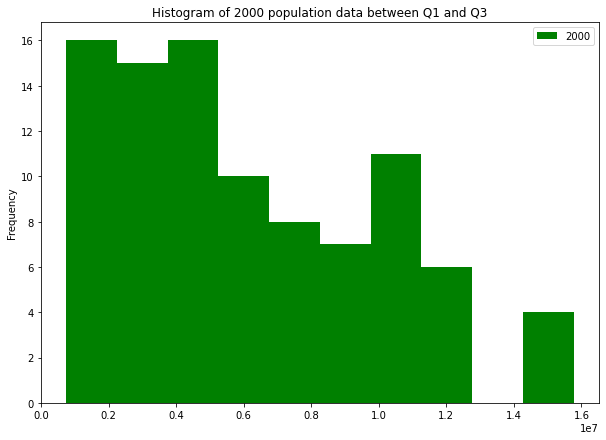

In [346]:
df_2000 = df[["Country Name","2000"]]
df_2000 = df_2000[(df_2000["2000"] >= stats_dict_decades_q1["2000"]) & (df_2000["2000"] <= stats_dict_decades_q3["2000"])]
df_2000 = df_2000.sort_values(by="2000")
df_2000= df_2000.reset_index(drop=True)
df_2000

# set up figure & axes
#fig, axes = plt.subplots(1, 1,figsize =(10, 7), tight_layout = True)
df_2000.plot.hist(color="green",figsize=(10,7),title="Histogram of 2000 population data between Q1 and Q3",xlabel="Population")

**Histogram for the year 1990**

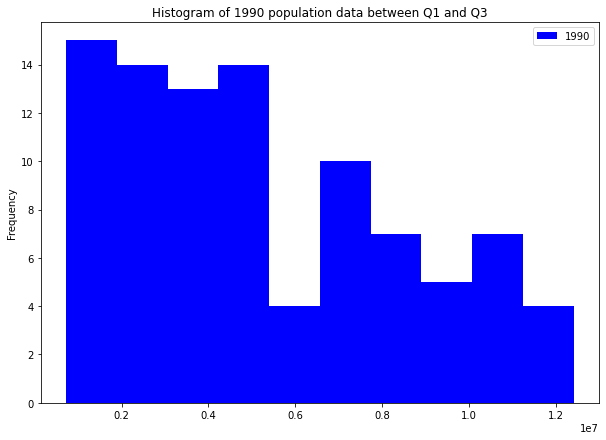

In [344]:
df_1990 = df[["Country Name","1990"]]
df_1990 = df_1990[(df_1990["1990"] >= stats_dict_decades_q1["1990"]) & (df_1990["1990"] <= stats_dict_decades_q3["1990"])]
df_1990 = df_1990.sort_values(by="1990")
df_1990 = df_1990.reset_index(drop=True)
df_1990

df_1990.plot.hist(color="blue",figsize=(10,7),title="Histogram of 1990 population data between Q1 and Q3",xlabel="Population")

**Histogram for the year 1980**

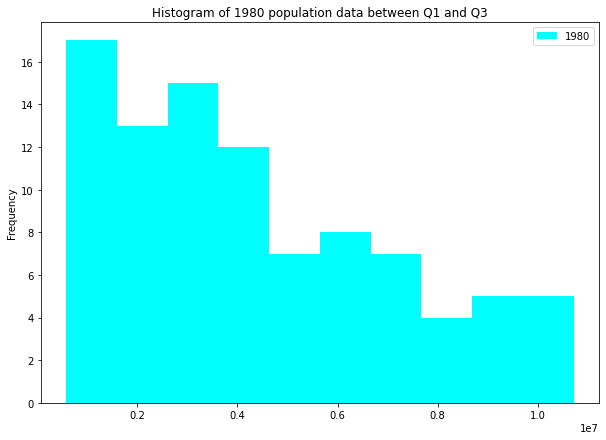

In [343]:
df_1980 = df[["Country Name","1980"]]
df_1980 = df_1980[(df_1980["1980"] >= stats_dict_decades_q1["1980"]) & (df_1980["1980"] <= stats_dict_decades_q3["1980"])]
df_1980 = df_1980.sort_values(by="1980")
df_1980 = df_1980.reset_index(drop=True)
df_1980

df_1980.plot.hist(color="cyan",figsize=(10,7),title="Histogram of 1980 population data between Q1 and Q3",xlabel="Population")

**Histogram for the year 1970**

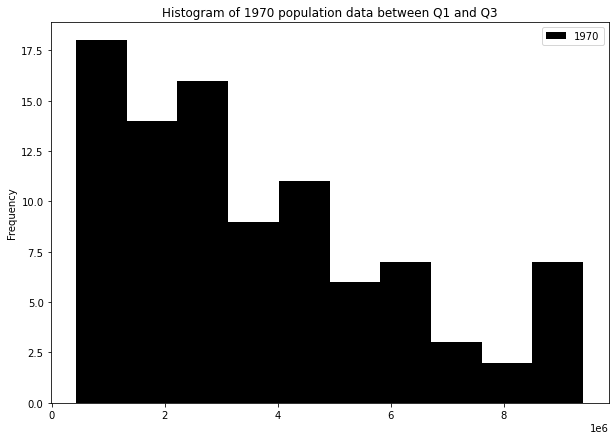

In [342]:
df_1970 = df[["Country Name","1970"]]
df_1970 = df_1970[(df_1970["1970"] >= stats_dict_decades_q1["1970"]) & (df_1970["1970"] <= stats_dict_decades_q3["1970"])]
df_1970 = df_1970.sort_values(by="1970")
df_1970 = df_1970.reset_index(drop=True)

# set up figure & axes
#fig, axes = plt.subplots(1, 1,figsize =(10, 7), tight_layout = True)

df_1970.plot.hist(color="black",figsize=(10,7),title="Histogram of 1970 population data between Q1 and Q3",xlabel="Population")

**Histogram for the year 1960**

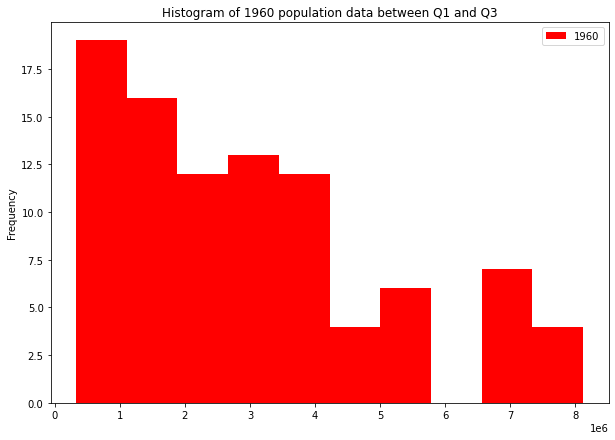

In [353]:
, xlabel
, title
df_1960 = df[["Country Name","1960"]]
df_1960 = df_1960[(df_1960["1960"] >= stats_dict_decades_q1["1960"]) & (df_1960["1960"] <= stats_dict_decades_q3["1960"])]
df_1960 = df_1960.sort_values(by="1960")
df_1960 = df_1960.reset_index(drop=True)

# set up figure & axes
#fig, axes = plt.subplots(1, 1,figsize =(10, 7), tight_layout = True)

df_1960.plot.hist(color="red",figsize=(10,7),title="Histogram of 1960 population data between Q1 and Q3",xlabel="Population")

10. examine your histograms. Any interesting observations?

Ans: For all these years the histogram is positively skewed with a longer tail on the right hand side, greater values in the left and tapers as we go to the right. This indicates a larger frequency of the values lie at the start, as compared to the end.


Q11. compute the rank of countries (by population) in 1960 and compute the difference in rank from 1960 to 2019. Which 5 countries experienced the largest positive change (by value, not percentage) in rank and which 5 countries experiences the largest negative change in rank.

In [309]:
df_1960 = df[["Country Name","1960"]]

#sorting countries based on descending order of their population
df_1960 = df_1960.sort_values(by="1960",ascending=False)

#Creating rank column that gives rank of 1 highly populated countries and increases as population reduces.  
df_1960.insert(2,'Rank_1960',range(1,1+len(df_1960)))


df_2019 = df[["Country Name","2019"]]

#sorting countries based on descending order of their population
df_2019 = df_2019.sort_values(by="2019",ascending=False)

#Creating rank column that gives rank of 1 highly populated countries and increases as population reduces.  
df_2019.insert(2,'Rank_2019',range(1,1+len(df_2019)))


df_1960 = df_1960.reset_index(drop=True)
df_2019 = df_2019.reset_index(drop=True)

In [310]:
df_1960.head()

,Country Name,1960,Rank_1960
0,China,667070000.0,1
1,India,450547679.0,2
2,United States,180671000.0,3
3,Japan,92500572.0,4
4,Indonesia,87751068.0,5


In [311]:
df_2019.head()

,Country Name,2019,Rank_2019
0,China,1.397715e+09,1
1,India,1.366418e+09,2
2,United States,3.282395e+08,3
3,Indonesia,2.706256e+08,4
4,Pakistan,2.165653e+08,5


In [312]:
#doing an inner join to merge two dataframes into one unified dataframe
df_11 = pd.merge(df_1960,df_2019,on="Country Name",how="inner")
df_11["Rank Difference"] = df_11["Rank_1960"]-df_11["Rank_2019"]
df_11 = df_11.sort_values(by="Rank Difference",ascending=False)
df_11.head()

,Country Name,1960,Rank_1960,2019,Rank_2019,Rank Difference
152,United Arab Emirates,92418.0,153,9770529.0,81,72
123,Jordan,933102.0,124,10101694.0,79,45
167,Qatar,47384.0,168,2832067.0,123,45
71,Saudi Arabia,4086539.0,72,34268528.0,36,36
80,Niger,3388764.0,81,23310715.0,47,34


In [313]:
df_11.tail()

,Country Name,1960,Rank_1960,2019,Rank_2019,Rank Difference
38,Czech Republic,9602006.0,39,10669709.0,76,-37
44,Belarus,8198000.0,45,9466856.0,84,-39
69,Croatia,4140181.0,70,4067500.0,113,-43
48,Bulgaria,7867374.0,49,6975761.0,93,-44
35,Hungary,9983967.0,36,9769949.0,82,-46


The 5 countries that have shown largest positive change in the decreasing order (high to low) are as follows:

1. United Arab Emirates
2. Jordan
3. Qatar
4. Saudi Arabia
5. Niger

The 5 countries that have shown largest negative change in the decreasing order (high to low) are as follows:

1. Hungary
2. Bulgaria
3. Croatia
4. Belarus
5. Czech Republic

12. take the population in 2019 (all countries). Compute the first digit and compute the % of occurrence of this digit.

In [314]:
df_12 = df[["2019"]]
df_12["2019"] = df_12["2019"].map(int)
df_12.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2019
0,106314
1,38041754
2,31825295
3,2854191
4,77142


In [315]:
import math

In [316]:
df_12["first_digit"] = df_12["2019"].astype(str).str[:1] 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [317]:
df_12.head()

,2019,first_digit
0,106314,1
1,38041754,3
2,31825295,3
3,2854191,2
4,77142,7


In [318]:
df_12_2 = ((df_12["first_digit"].value_counts())/(df_12["first_digit"].count()))*100
df_12_2 = df_12_2.round(2)

In [319]:
df_12_2 = df_12_2.to_frame()
df_12_2 = df_12_2.reset_index()
df_12_2 = df_12_2.rename(columns={"first_digit":"% occurence","index":"digit"})

In [320]:
df_12_2

,digit,% occurence
0,1,31.02
1,2,14.97
2,3,14.44
3,5,9.63
4,4,8.56
5,6,8.02
6,9,5.35
7,8,4.81
8,7,3.21
